# **Table of Content**
* [Gathering Data](#gathering)
* [Assessing Data](#assessing)
* [Cleaning Data](#cleaning)
* [Storing Data](#storing)
* [Analyzing & Visualizing Data](#analyzing-visualizing)

# Gathering Data<a class="anchor" id="gathering"></a> 
Gathring data from three different formats `.csv`,`.tsv`,and `.txt`. The `.txt` file should be made from the tweets `json` content that where gathered from Twitter API but unfortunately chouldn't get the access, so I decided choose the alternative way and download the provided `.txt` file.

In [1]:
# Importing required packages and libraries
import pandas as pd
import numpy as np
import requests 
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# reading first file 'twitter-archive-enhanced.csv' and saving its content to archive_df 
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
# showing random 10 lines of the loaded file to get an overveiw of the file
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
49,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None
857,763956972077010945,7.638652e+17,1.584641e+07,2016-08-12 04:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,NaN,NaN,NaN,NaN,12,10,None,doggo,None,None,None
878,760656994973933572,NaN,NaN,2016-08-03 02:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rose. Her face is stuck like that. 11/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/760656994...,11,10,Rose,None,None,None,None


In [3]:
# downloading second file 'image-predictions.tsv' from udacity servers using requests lib.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]
response = requests.get(url)

In [4]:
# check whether the file was created or not,if not create it, then write the response of the request to the file 
if not os.path.isfile(filename):
    with open(filename,'wb') as file:
        file.write(response.content)

In [5]:
# now reading second file 'image-predictions.tsv' and saving its content to image_predictions_df 
image_predictions_df = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
# reading third file 'tweet-json.txt' and saving its content to api_df 

# create api_df_list to save the extracted data from each line (tweet) in 'tweet-json.txt' file,then create api_df 
api_df_list=[]

# iterate on all lines in 'tweet-json.txt' to extract tweet_id, retweet_count, and favorite_count.
with open('tweet-json.txt','r') as tweets:
    for tweet in tweets:
        tweet = json.loads(tweet)
        # if ['favorite_count'] main key in the primary json object of the tweet is equal to zero, then
        # pick up te value of ['favorite_count'] key of the ['retweeted_status'] json object.
        if tweet['favorite_count'] == 0 :
            favorite_count = tweet['retweeted_status']['favorite_count']
        else :
            favorite_count = tweet['favorite_count']
        # save the extracted data in a dectionary then append it to api_df_list
        api_df_list.append({
            "tweet_id": tweet['id'],
            "retweet_count": tweet['retweet_count'],
            "favorite_count": favorite_count
        })

# after reading all the file, create api_df by converting api_df_list to a pd.DataFrame     
api_df= pd.DataFrame(api_df_list)
api_df.head(10)

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


# Assessing Data<a class="anchor" id="assessing"></a> 
Asssessing data in both ways visually and programmatically.

## Quality issues
### `archive_df`:

- Dog stage four columns contain 'None'  instead of `NaN`.
-------------
- `name`:
    - `name` column contain non-dog names such as: 'a', 'an', 'not', 'his','the' or 'very' ...  instead of `NaN` or the dog name (if found). e.g.,'a' or 'an' in `name` column are a result of bad extracting the right name(if found) from the text.
    - 'None' is entered for dogs with no names instead of `NaN`
-------------
- `rating_denominator` 
    - `rating_denominator` can be 'multiples of 10' based on the number of dogs in the same picture in the tweet.
    - `rating_denominator` other values of '2','7','11' , '15' , '16' and others can be found.  (manaual fixation needed in this case)

-------------    
- `rating_numerator` 
    - `rating_numerator` contain retweet count instead of rating. (manaual fixation needed in this case)
    - `rating_numerator` contain some wrong rating values 'BELOW 10' (other animals than dogs)
    or 'OVER10' e.g., 9.75 is extracted as 75/10!! (major fixation of numerator will be done as a result of fixing point 1 in assessing `rating_denominator` but further fixation would be manual )
-------------
- `timestamp` column should be of type datetime.
-------------
- `expanded_url` blank spaces should be dropped as they don't contain any image to predict.

- Some tweets are actually retweets and replies not original tweets also have to be deleted.
    - `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`,`expanded_urls` columns should be used to detect retweets and replies and then be dropped
    
- Some ids in `tweet_id` column not found in `image_predictions_df` so must be dropped from `archive_df` to make the  two dataframes consistant.


### `image_predictions_df`:
- Undescriptive column names: `p1`,`p1_conf`,`p1_dog` instead of 'prediction1','confidence1','is_dog1'
- Dog breeds in `p's` columns either in uppercase or lowercase 


### `api_df`:
- Some `favorite_count` found to be '0' as the primary key of the tweet object have a value of zero. So the alternative approach is to get `favorite_count` from `retweet_status` as both retweet_count are equal (solved while gathering)

``` python

        if tweet['favorite_count'] == 0 :
            favorite_count = tweet['retweeted_status']['favorite_count']
        else :
            favorite_count = tweet['favorite_count'] 
        ```

## Tidiness issues
### `archive_df`:

- Dog stage in found in four columns instead of one column
- Some tweets pictures contain more than one dog (e.g., father and son) which conduct two dog stages for the same tweet.

### `image_predictions_df`:
- (p1,p2,p3) (p1_conf,p2_conf,p3_conf),and (p1_dog ,p2_dog ,p3_dog ) are in 3 columns each instead of one column for each feature.
- this dataset should be merged with `archive_df` to add to the master dataset.

### `api_df`:
- this dataset should be merged with `archive_df` to add to the master dataset.

In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
# checking common names in archive_df.name
archive_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
an            7
Toby          7
Buddy         7
Jack          6
Bella         6
Koda          6
Oscar         6
Milo          6
Dave          6
Leo           6
Stanley       6
Scout         6
Rusty         6
Jax           6
Bentley       5
           ... 
Petrick       1
Stewie        1
Blu           1
General       1
Angel         1
Mary          1
Diogi         1
Zoe           1
Mollie        1
space         1
Pupcasso      1
Darby         1
Liam          1
Obie          1
Rover         1
Clarq         1
Holly         1
Bauer         1
Stu           1
Wishes        1
Cheryl        1
Millie        1
Superpup      1
Emmie         1
Fabio         1
Jeremy        1
Dale          1
Hamrick       1
Opie          1
Lili          1
Name: name, Length: 957,

In [9]:
# one example of wrong names found in archive_df.name
archive_df[archive_df.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None
1340,704859558691414016,NaN,NaN,2016-03-02 02:43:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,None,None,pupper,None


In [10]:
# checking values of archive_df.rating_denominator
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# one example of dogs found to be in same picture (tweet) getting the same ratings for all of them, in this case 5 dogs 
archive_df[archive_df.rating_denominator == 50]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [12]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
# example of wrong rating values 'BELOW 10' (other animals than dogs) in general.
archive_df[archive_df.rating_numerator == 9]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,9,10,None,None,None,None,None
946,752568224206688256,NaN,NaN,2016-07-11 18:20:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here are three doggos completely misjudging an...,NaN,NaN,NaN,https://vine.co/v/5W0bdhEUUVT,9,10,None,None,None,None,None
966,750383411068534784,NaN,NaN,2016-07-05 17:38:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoe. She was trying to stealthily take...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750383411...,9,10,Zoe,None,None,pupper,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9,10,an,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None
1035,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,None,None,None,puppo
1060,741438259667034112,NaN,NaN,2016-06-11 01:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's still figuring out couche...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741438259...,9,10,Tucker,None,None,None,None


In [14]:
# undescriptive columns name, with tidiness issue for such columns.
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
653,682047327939461121,https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg,1,teddy,0.364095,False,doormat,0.119243,False,toyshop,0.035127,False
626,680801747103793152,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,1,pug,0.996720,True,Labrador_retriever,0.001439,True,Staffordshire_bullterrier,0.000518,True
1145,730427201120833536,https://pbs.twimg.com/media/CiL_qh0W0AAu5VA.jpg,1,Eskimo_dog,0.682082,True,Siberian_husky,0.289288,True,Staffordshire_bullterrier,0.008771,True
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True
1244,747461612269887489,https://pbs.twimg.com/media/Cl-EXHSWkAE2IN2.jpg,1,binoculars,0.192717,False,barbershop,0.085838,False,ballplayer,0.084672,False
1830,836260088725786625,https://pbs.twimg.com/media/C5r-G2IUwAA6KBY.jpg,1,borzoi,0.564688,True,ice_bear,0.078267,False,Pembroke,0.057916,True
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,1,chow,0.822103,True,Norwich_terrier,0.106075,True,Norfolk_terrier,0.037348,True


In [15]:
#seems fine
api_df.info()
api_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,favorite_count,retweet_count,tweet_id
1192,1748,510,717428917016076293
1148,4811,1302,726224900189511680
337,18792,3652,832369877331693569
625,18139,6288,795076730285391872
2093,1154,466,670764103623966721


## Cleaning Data<a class="anchor" id="cleaning"></a> 
**cleaning process will be as following:**
   - miss entered,badly extracted and missing data.
   - tidiness issues
   - other quality issues

In [16]:
# make a copy of each df to be cleaned next.
archive_df_cleaned = archive_df.copy()
image_predictions_df_cleaned = image_predictions_df.copy()
api_df_cleaned = api_df.copy()

### Miss entered,badly extracted and missing data.

#### Dog stage four columns contain 'None'  instead of `NaN`.
**Define:** 
   - replacing each 'None' with `NaN` in [doggo, floofer, pupper, puppo] columns.                                                                                             

In [17]:
dog_stage_list=["doggo", "floofer", "pupper", "puppo"]
for column in dog_stage_list:
    print(archive_df_cleaned[column].value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [18]:
#cleaning 
for column in dog_stage_list:
    archive_df_cleaned[column]=archive_df_cleaned[column].replace('None',np.nan)    

In [19]:
#testing
for column in dog_stage_list:
    print(archive_df_cleaned[column].value_counts())
    # as shown below, 'None' values were replaced with 'np.nan' 


doggo    97
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    30
Name: puppo, dtype: int64


#### `name` column contain non-dog names such as:  'a', 'an', 'not', 'his','the' or 'very' ...  instead of `NaN` or the dog name (if found). e.g.,'a' or 'an' in `name` column are a result of bad extracting the right name (if found) from the text.
#### 'None' is entered for dogs with no names instead of `NaN`
**Define:**
   - replacing ('a', 'an', 'not', 'his','the', 'very', ..) or any name found to be starting with lowercase with `NaN`, as all non-dog names found to be starting with lowercase while real dogs names where starting with uppercase. 
   - replacin all 'None' with `NaN`

In [20]:
print(archive_df_cleaned.name.value_counts())
print(archive_df_cleaned.name.str.islower().sum())

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
Bailey        7
an            7
Toby          7
Buddy         7
Jack          6
Bella         6
Koda          6
Oscar         6
Milo          6
Dave          6
Leo           6
Stanley       6
Scout         6
Rusty         6
Jax           6
Bentley       5
           ... 
Petrick       1
Stewie        1
Blu           1
General       1
Angel         1
Mary          1
Diogi         1
Zoe           1
Mollie        1
space         1
Pupcasso      1
Darby         1
Liam          1
Obie          1
Rover         1
Clarq         1
Holly         1
Bauer         1
Stu           1
Wishes        1
Cheryl        1
Millie        1
Superpup      1
Emmie         1
Fabio         1
Jeremy        1
Dale          1
Hamrick       1
Opie          1
Lili          1
Name: name, Length: 957,

In [21]:
#cleaning 
# mask method replace values in a series when condition is true.
archive_df_cleaned['name'].mask(archive_df_cleaned.name.str.islower(),np.nan,inplace=True)
archive_df_cleaned.name.replace('None',np.nan,inplace=True)

In [22]:
#testing
print(archive_df_cleaned.name.value_counts())
print(archive_df_cleaned.name.str.islower().any())

Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Bo             9
Winston        9
Sadie          8
Bailey         7
Toby           7
Daisy          7
Buddy          7
Stanley        6
Dave           6
Milo           6
Leo            6
Koda           6
Rusty          6
Bella          6
Oscar          6
Jax            6
Jack           6
Scout          6
George         5
Chester        5
Larry          5
Sammy          5
Finn           5
              ..
Reagan         1
Brandonald     1
Chevy          1
Ambrose        1
Donny          1
Roscoe         1
Opie           1
Hamrick        1
Dale           1
Jeremy         1
Callie         1
Blanket        1
Smiley         1
Kawhi          1
Harvey         1
Mosby          1
Darby          1
Liam           1
Obie           1
Rover          1
Clarq          1
Holly          1
Bauer          1
Stu            1
Cheryl         1
Millie         1
Superpup       1
Emmie         

In [23]:
# further checking
archive_df_cleaned[archive_df_cleaned.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [24]:
archive_df_cleaned.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1147,726935089318363137,NaN,NaN,2016-05-02 00:43:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprout. He's just precious af. 12/10 I...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726935089...,12,10,Sprout,NaN,NaN,NaN,NaN
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Joshwa. He is a fuckboy supreme. He cl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525...,11,10,Joshwa,NaN,NaN,NaN,NaN
2165,669367896104181761,NaN,NaN,2015-11-25 04:11:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. Chip's pretending to be choked. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,NaN,NaN,NaN,NaN
2216,668537837512433665,NaN,NaN,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spark. He's nervous. Other dog hasn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837...,8,10,Spark,NaN,NaN,NaN,NaN
1616,685198997565345792,NaN,NaN,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,NaN,NaN,NaN,NaN
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Blu. He's a wild bush Floofer. I wish ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047...,12,10,Blu,NaN,floofer,NaN,NaN
1462,694905863685980160,NaN,NaN,2016-02-03 15:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He's a Bisquick Taj Mapaw. Too...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,NaN,NaN,NaN,NaN
2012,672239279297454080,NaN,NaN,2015-12-03 02:21:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ridley. He doesn't know how to couch. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672239279...,7,10,Ridley,NaN,NaN,NaN,NaN
375,828361771580813312,NaN,NaN,2017-02-05 21:56:51 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaN,NaN,12,10,NaN,NaN,NaN,NaN,NaN
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,NaN,NaN,NaN,NaN,NaN


### Tidiness issues

### in `archive_df_cleaned`: 
#### Dog stage in found in four columns instead of one column
#### Some tweets pictures contain more than one dog (e.g., father and son) which conduct two dog stages for the same tweet.
**Define:** 
   - gather [doggo, floofer, pupper, puppo] columns into one column called dog_stage. 

In [25]:
#cleaning 
archive_df_cleaned = pd.melt(archive_df_cleaned,id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name'],value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='stage', value_name='dog_stage')

In [26]:
#testing
archive_df_cleaned.info()
archive_df_cleaned.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 15 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
timestamp                     9424 non-null object
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          6008 non-null object
stage                         9424 non-null object
dog_stage                     394 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 1.1+ MB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,dog_stage
7845,776088319444877312,NaN,NaN,2016-09-14 16:00:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't tap the screen to make the hearts appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776088319...,10,10,NaN,puppo,NaN
6062,704113298707505153,NaN,NaN,2016-02-29 01:17:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He's an inverted Uzbekistani wat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704113298...,8,10,Stanley,pupper,NaN
1088,737826014890496000,NaN,NaN,2016-06-01 02:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remy. He has some long ass ears (proba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737826014...,10,10,Remy,doggo,NaN
1345,704491224099647488,7.044857e+17,28785486.0,2016-03-01 02:19:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 hero af\n@ABC,NaN,NaN,NaN,NaN,13,10,NaN,doggo,NaN
5808,736365877722001409,NaN,NaN,2016-05-28 01:18:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's extremely impatient. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736365877...,11,10,Rory,pupper,pupper


In [27]:
#cleaning
# now lets drop stage column as it won't be useful.
archive_df_cleaned.drop(columns='stage', inplace=True)

# first level of dropping duplicates:
# rows with the same data will be dropped, except for one of them.
# HINT: four rows have exactly the same data (dog_stage = NaN as a result of melt function above),
#one row will be kept only others will be dropped
archive_df_cleaned.drop_duplicates(inplace=True)

# second level of dropping duplicates:
# for any rows (two and more usually two) with the same data except for dog_stage column,
# the one row with dog_stage=NaN would be dropped.
# iteration would be on all values of a tweet_id.
for id in archive_df_cleaned.tweet_id:
    sub = archive_df_cleaned[archive_df_cleaned.tweet_id == id]# rows having the same tweet_id 
    if len(sub)>=2:
        index= sub[sub.dog_stage.isnull()].index # droping the one with dog_stage=NaN by its index
        archive_df_cleaned.drop(index,inplace=True)

# reset index of dropping rows with dog_stage=NaN
archive_df_cleaned.reset_index(drop=True,inplace=True)


In [28]:
#testing
# showing duplicated rows(have different dog_stage values for the same tweet 'tweet_id' as it include more than one dog)
# archive_df_cleaned[archive_df_cleaned.tweet_id.duplicated()]
for id in archive_df_cleaned.tweet_id:
    sub = archive_df_cleaned[archive_df_cleaned.tweet_id == id]
    if len(sub)>=2:
        print(sub[['tweet_id','dog_stage']])

                tweet_id dog_stage
172   855851453814013952     doggo
2346  855851453814013952     puppo
                tweet_id dog_stage
180   854010172552949760     doggo
2074  854010172552949760   floofer
                tweet_id dog_stage
420   817777686764523521     doggo
2110  817777686764523521    pupper
                tweet_id dog_stage
484   808106460588765185     doggo
2117  808106460588765185    pupper
                tweet_id dog_stage
514   802265048156610565     doggo
2120  802265048156610565    pupper
                tweet_id dog_stage
523   801115127852503040     doggo
2121  801115127852503040    pupper
                tweet_id dog_stage
637   785639753186217984     doggo
2132  785639753186217984    pupper
                tweet_id dog_stage
664   781308096455073793     doggo
2133  781308096455073793    pupper
                tweet_id dog_stage
701   775898661951791106     doggo
2140  775898661951791106    pupper
                tweet_id dog_stage
741   77009376777699

### in `image_predictions_df`:
#### Undescriptive column names: `p1`,`p1_conf`,`p1_dog` instead of 'prediction1','confidence1','is_dog1'
#### Dog breeds in `p's` columns either in uppercase or lowercase .
#### (p1,p2,p3), (p1_conf,p2_conf,p3_conf),and (p1_dog ,p2_dog ,p3_dog ) are in 3 columns each instead of one column for each feature.
**Define:**
   - rename  `p1` to 'prediction1' ,`p1_conf` to 'confidence1,`p1_dog` to 'is_dog1'
   - group each feature of (p,p_conf,p_dog) under one column instead of three using pd.wide_to_long()
   - standardize all dog breeds to start with uppercase.

In [29]:
image_predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
#cleaning 1st issue
image_predictions_df_cleaned.rename(columns={'p1':'prediction1','p2':'prediction2','p3':'prediction3',
                                             'p1_conf':'confidence1','p2_conf':'confidence2','p3_conf':'confidence3',
                                             'p1_dog':'is_dog1','p2_dog':'is_dog2','p3_dog':'is_dog3'}, 
                                             inplace=True
                                    )

In [31]:
#testing
image_predictions_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id       2075 non-null int64
jpg_url        2075 non-null object
img_num        2075 non-null int64
prediction1    2075 non-null object
confidence1    2075 non-null float64
is_dog1        2075 non-null bool
prediction2    2075 non-null object
confidence2    2075 non-null float64
is_dog2        2075 non-null bool
prediction3    2075 non-null object
confidence3    2075 non-null float64
is_dog3        2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions_df_cleaned.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1', 'confidence1',
       'is_dog1', 'prediction2', 'confidence2', 'is_dog2', 'prediction3',
       'confidence3', 'is_dog3'],
      dtype='object')

In [33]:
#cleaning 2nd issue
image_predictions_df_cleaned = pd.wide_to_long(image_predictions_df_cleaned,stubnames={'prediction','confidence','is_dog'},i='tweet_id',j='prediction_num').reset_index()

In [34]:
#testing 
image_predictions_df_cleaned.columns

Index(['tweet_id', 'prediction_num', 'jpg_url', 'img_num', 'prediction',
       'confidence', 'is_dog'],
      dtype='object')

In [35]:
image_predictions_df_cleaned.prediction.value_counts()

golden_retriever                  290
Labrador_retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          115
Pomeranian                        109
toy_poodle                        105
pug                                97
chow                               96
cocker_spaniel                     95
French_bulldog                     93
Chesapeake_Bay_retriever           91
Eskimo_dog                         83
beagle                             77
kuvasz                             76
Siberian_husky                     72
Samoyed                            70
Staffordshire_bullterrier          70
malamute                           69
Pekinese                           63
kelpie                             62
American_Staffordshire_terrier     58
miniature_pinscher                 57
Great_Pyrenees                     55
miniature_poodle                   54
collie                             51
German_sheph

In [36]:
#cleaning 3rd issue
image_predictions_df_cleaned.prediction = image_predictions_df_cleaned.prediction.str.title()

In [37]:
#testing
image_predictions_df_cleaned.prediction.value_counts()

Golden_Retriever                  290
Labrador_Retriever                283
Chihuahua                         185
Pembroke                          143
Cardigan                          116
Pomeranian                        109
Toy_Poodle                        105
Pug                                97
Chow                               96
Cocker_Spaniel                     95
French_Bulldog                     93
Chesapeake_Bay_Retriever           91
Eskimo_Dog                         83
Beagle                             77
Kuvasz                             76
Siberian_Husky                     72
Staffordshire_Bullterrier          70
Samoyed                            70
Malamute                           69
Pekinese                           63
Kelpie                             62
American_Staffordshire_Terrier     58
Miniature_Pinscher                 57
Great_Pyrenees                     55
Miniature_Poodle                   54
Collie                             51
Seat_Belt   

### Other quality issues

#### `expanded_url` blank spaces should be dropped as they don't contain any image to predict.

#### Some tweets are actually retweets and replies not original tweets that have to be deleted.
-  `in_reply_to_status_id`,`in_reply_to_user_id`,`retweeted_status_id`,`retweeted_status_user_id`,`retweeted_status_timestamp`,`expanded_urls` columns should be used to detect retweets and replies and then be dropped
    
#### Some `tweet_id` not found in `image_predictions_df` so must be dropped from `archive_df`
-------
**Define:**
   - drop empty cells in the `expanded_url` column cause they refer to no pictures
   - as showen below we have 79 replies and 183 retweets, they can be dropped by using:`in_reply_to_user_id` and `retweeted_status_user_id` then drop related columns to replies and retweets
   - drop  `tweet_id` from `archive_df` if not found in `image_predictions_df` .


In [38]:
archive_df_cleaned.info()
archive_df_cleaned.expanded_urls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 14 columns):
tweet_id                      2370 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          1506 non-null object
dog_stage                     394 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 259.3+ KB


59

In [39]:
#cleaning 1st issue
archive_df_cleaned.dropna(axis=0,subset=['expanded_urls'] ,inplace=True)
archive_df_cleaned.reset_index(drop=True,inplace=True)

In [40]:
#testing
archive_df_cleaned.info()
archive_df_cleaned.expanded_urls.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 14 columns):
tweet_id                      2311 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2311 non-null object
source                        2311 non-null object
text                          2311 non-null object
retweeted_status_id           182 non-null float64
retweeted_status_user_id      182 non-null float64
retweeted_status_timestamp    182 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2311 non-null int64
rating_denominator            2311 non-null int64
name                          1506 non-null object
dog_stage                     388 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 252.8+ KB


0

In [41]:
#cleaning 2nd issue
#droping replies and tweets using 1 column related to each 
archive_df_cleaned.drop(archive_df_cleaned[archive_df_cleaned.in_reply_to_user_id.notnull()].index ,inplace=True)
archive_df_cleaned.drop(archive_df_cleaned[archive_df_cleaned.retweeted_status_user_id.notnull()].index,inplace=True)
archive_df_cleaned.reset_index(drop=True,inplace=True)

In [42]:
#testing
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 14 columns):
tweet_id                      2105 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2105 non-null object
source                        2105 non-null object
text                          2105 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2105 non-null object
rating_numerator              2105 non-null int64
rating_denominator            2105 non-null int64
name                          1394 non-null object
dog_stage                     346 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 230.3+ KB


In [43]:
#cleaning 2nd issue cont.
archive_df_cleaned.drop(columns={'in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 
                                 'retweeted_status_user_id','retweeted_status_timestamp'},inplace= True)

In [44]:
#testing
archive_df_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [45]:
# find tweets (tweet_ids) found in archive_df_cleaned but not in image_predictions_df_cleaned
ids_list = list (set(archive_df_cleaned.tweet_id.values) - set(image_predictions_df_cleaned.tweet_id.values))
len(ids_list)

123

In [46]:
#cleaning 3rd issue
# dropping eaching one of them using its tweet_id from archive_df_cleaned
for id in ids_list:
    archive_df_cleaned.drop(archive_df_cleaned[archive_df_cleaned.tweet_id == id].index,inplace=True)
archive_df_cleaned.reset_index(drop=True,inplace=True)

In [47]:
#testing
archive_df_cleaned.info()
ids_list = list (set(archive_df_cleaned.tweet_id.values) - set(image_predictions_df_cleaned.tweet_id.values))
len(ids_list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 9 columns):
tweet_id              1981 non-null int64
timestamp             1981 non-null object
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null int64
name                  1353 non-null object
dog_stage             313 non-null object
dtypes: int64(3), object(6)
memory usage: 139.4+ KB


0

#### `timestamp` column should be of type datetime.
---------------
**Define:**
   - change `timestamp` dtype from object to datetime


In [48]:
#cleaning
archive_df_cleaned.timestamp = pd.to_datetime(archive_df_cleaned.timestamp)

In [49]:
#testing
archive_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Data columns (total 9 columns):
tweet_id              1981 non-null int64
timestamp             1981 non-null datetime64[ns]
source                1981 non-null object
text                  1981 non-null object
expanded_urls         1981 non-null object
rating_numerator      1981 non-null int64
rating_denominator    1981 non-null int64
name                  1353 non-null object
dog_stage             313 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 139.4+ KB


#### `rating_denominator` 
   #### `rating_denominator` can be 'multiples of 10' based on the number of dogs in the same picture in the tweet.
**Define:**
   - replace these multiples of 10 found in `rating_denominator`  to 10 and also replace the corrosponding `rating_numerator` with correct values based on the number of dogs.

In [50]:
# showing values of rating_denominator other than 10.
deno_list = list (set(archive_df_cleaned.rating_denominator.values)-{10})
print(deno_list)
archive_df_cleaned[archive_df_cleaned.rating_denominator == 50]#example

[2, 70, 7, 40, 11, 170, 110, 80, 50, 20, 150, 120, 90]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
822,716439118184652801,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN
882,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN
937,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,60,50,NaN,NaN


In [51]:
#cleaning
# iterate on each element in denominator values list (deno_list) and calculate
# dog_num found in the tweet, replace denominator value(deno) with 10, and replace the corrosponding list of numerators values
# with the correct one.
for deno in deno_list :
    #chech if the denominator value is multiple of 10
    if deno%10 == 0 :
        dogs_num = deno/10
        
        numer_list = archive_df_cleaned[archive_df_cleaned.rating_denominator == deno].rating_numerator
        archive_df_cleaned.rating_denominator.replace(deno,10,inplace=True)
        
        for numer in numer_list:
            archive_df_cleaned.rating_numerator.replace(numer,numer//dogs_num,inplace=True)

        #showing values of denominator and numerater values being replaced with the right ones.  
        d =list (set(archive_df_cleaned.rating_denominator.values)-{10})   
        n = (numer_list,numer_list//dogs_num)
        print(d,n)
        

[2, 7, 40, 170, 11, 110, 80, 50, 20, 150, 120, 90] (291    84
Name: rating_numerator, dtype: int64, 291    12.0
Name: rating_numerator, dtype: float64)
[2, 7, 170, 11, 110, 80, 50, 20, 150, 120, 90] (999    44
Name: rating_numerator, dtype: int64, 999    11.0
Name: rating_numerator, dtype: float64)
[2, 7, 11, 110, 80, 50, 20, 150, 120, 90] (759    204
Name: rating_numerator, dtype: int64, 759    12.0
Name: rating_numerator, dtype: float64)
[2, 7, 11, 80, 50, 20, 150, 120, 90] (1129    121
Name: rating_numerator, dtype: int64, 1129    11.0
Name: rating_numerator, dtype: float64)
[2, 7, 11, 50, 20, 150, 120, 90] (865     80
1281    88
Name: rating_numerator, dtype: int64, 865     10.0
1281    11.0
Name: rating_numerator, dtype: float64)
[2, 7, 11, 20, 150, 120, 90] (822    50
882    45
937    60
Name: rating_numerator, dtype: int64, 822    10.0
882     9.0
937    12.0
Name: rating_numerator, dtype: float64)
[2, 7, 11, 150, 120, 90] (793    4
Name: rating_numerator, dtype: int64, 793    2

In [52]:
#testing
#rest of denominator values that would be cleaned manaully(if found) (which would be out of my cleaning process scope)
deno_list = list (set(archive_df_cleaned.rating_denominator.values)-{10})
deno_list

[2, 11, 7]

In [53]:
#one example of them
archive_df_cleaned[archive_df_cleaned.rating_denominator == 11]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
718,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN
1147,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,NaN


# P.S.
#### `rating_numerator` 
   ##### `rating_numerator` contain retweet count instead of rating.
   ##### `rating_numerator` contain some wrong rating values 'BELOW 10' (other animals than dogs) or 'OVER10' 9.75 is 75/10!!
   --------------
**generally, both would require to be cleaned manaully (which would be out of my cleaning process scope)** 
# so based on that we would consider valid numerator values to be with in [10,14] interval  

In [54]:
ne_list = list (set(archive_df_cleaned.rating_numerator.values))
print(ne_list)
len(archive_df_cleaned[(archive_df_cleaned.rating_numerator >= 10) &  (archive_df_cleaned.rating_numerator < 15)])

[0, 1, 2, 3, 420, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 75, 1776, 24, 26, 27]


1561

#### FINALLY
#### for `api_df`:
#### this data set should be merged with `archive_df` to add to master data set.
#### for `image_predictions_df_cleaned`:
#### this data set should be merged with `archive_df` to add to master data set.
--------------
**Define:**
   - merging `archived_df_cleaned` with `api_df_cleaned` to form 'twitter_archive_master' dataset
   - merging `archived_df_cleaned` with `image_predictions_df_cleaned` to form 'twitter_archive_master' dataset


In [55]:
#cleaning
twitter_archive_master = pd.merge(archive_df_cleaned,api_df,how= 'left',on = 'tweet_id' )
master_df = pd.merge(twitter_archive_master, image_predictions_df_cleaned, how='left',on = 'tweet_id')

In [56]:
#testing
twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
271,824775126675836928,2017-01-27 00:24:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter. His lack of opposable thumbs ...,https://twitter.com/dog_rates/status/824775126...,12,10,Scooter,NaN,16508,4069
524,772581559778025472,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,NaN,NaN,7192,1968
491,779834332596887552,2016-09-25 00:06:08,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He really wants to kiss himself...,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,NaN,21252,8237
1237,677673981332312066,2015-12-18 02:17:22,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,https://twitter.com/dog_rates/status/677673981...,9,10,NaN,NaN,3603,1677
1832,705975130514706432,2016-03-05 04:36:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Adele. Her tongue flies out of her mou...,https://twitter.com/dog_rates/status/705975130...,10,10,Adele,pupper,3397,842


In [57]:
master_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,prediction_num,jpg_url,img_num,prediction,confidence,is_dog
3144,691416866452082688,2016-01-25 00:26:41,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,https://twitter.com/dog_rates/status/691416866...,13,10,NaN,NaN,21253,8689,1,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_Terrier,0.530104,True
2076,745433870967832576,2016-06-22 01:50:58,"<a href=""http://twitter.com/download/iphone"" r...",This is Lenox. She's in a wheelbarrow. Silly d...,https://twitter.com/dog_rates/status/745433870...,10,10,Lenox,doggo,7824,2894,1,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,Barrow,0.999962,False
1508,777684233540206592,2016-09-19 01:42:24,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,NaN,NaN,12518,3403,3,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,Otterhound,0.110921,True
1582,772114945936949249,2016-09-03 16:52:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's very nervous for the game. ...,https://twitter.com/dog_rates/status/772114945...,10,10,Finn,NaN,3005,546,2,https://pbs.twimg.com/media/Crcacf9WgAEcrMh.jpg,1,Toy_Terrier,0.052980,True
5468,719704490224398336,2016-04-12 01:51:36,"<a href=""http://twitter.com/download/iphone"" r...",This is Clyde. He's making sure you're having ...,https://twitter.com/dog_rates/status/719704490...,12,10,Clyde,pupper,4974,1645,3,https://pbs.twimg.com/media/CfznaXuUsAAH-py.jpg,1,Bathtub,0.035528,False


# Storing Data<a class="anchor" id="storing"></a> 
## in one file `twitter_archive_master.csv`

In [58]:
master_df.to_csv('twitter_archive_master.csv',index=False)

In [59]:
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,prediction_num,jpg_url,img_num,prediction,confidence,is_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,2,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,39467,8853,3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,33819,6514,2,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Pekinese,0.090647,True


In [60]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5943 entries, 0 to 5942
Data columns (total 17 columns):
tweet_id              5943 non-null int64
timestamp             5943 non-null datetime64[ns]
source                5943 non-null object
text                  5943 non-null object
expanded_urls         5943 non-null object
rating_numerator      5943 non-null int64
rating_denominator    5943 non-null int64
name                  4059 non-null object
dog_stage             939 non-null object
favorite_count        5943 non-null int64
retweet_count         5943 non-null int64
prediction_num        5943 non-null int64
jpg_url               5943 non-null object
img_num               5943 non-null int64
prediction            5943 non-null object
confidence            5943 non-null float64
is_dog                5943 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(7), object(7)
memory usage: 795.1+ KB


# P.S.
**for analysis purposes we will use `twitter_archive_master` dataframe that contains both `archive_df_cleaned` and `api_df_cleaned` only, and `image_predictions_df_cleaned` seperately to produce clearer insights for both datasets, rather than using `master_df`.**

# Analyzing & Visualizing Data<a class="anchor" id="analyzing-visualizing"></a> 

## in `twitter_archive_master`:

### Insight1:
In this analyze we are curious to know which dog stage receives more attention via answering the following questions: 
   -  (a) Which dog stage gets more favorites and retweets on average?
   -  (b) Which dog stage gets higher ratings on average?

In [61]:
# let's groupby twitter_archive_master 'dog_stage' column, then show some basic statistics for 'favorite_count','retweet_count'
insight1a = twitter_archive_master.groupby('dog_stage')[['favorite_count','retweet_count']].describe()
insight1a

favorite_count                                               \
                   count          mean           std     min      25%   
dog_stage                                                               
doggo               73.0  19044.164384  21359.955241  2593.0  8295.00   
floofer              8.0  13701.375000  10516.926166  2262.0  5560.75   
pupper             209.0   7479.019139  10857.577740   693.0  2459.00   
puppo               23.0  22723.913043  27931.824108  3277.0  7067.00   

                                       retweet_count               \
               50%       75%       max         count         mean   
dog_stage                                                           
doggo      12157.0  20275.00  131075.0          73.0  6941.452055   
floofer    11879.0  18623.25   33345.0           8.0  4776.750000   
pupper      3397.0   8282.00  106827.0         209.0  2459.622010   
puppo      15359.0  21977.50  132810.0          23.0  7027.086957   

                                                                  
                    std    min     25%     50%      75%      max  
dog_stage                                                         
doggo      12183.189954  725.0  2072.0  3128.0  5237.00  79515.0  
floofer     5732.138787  496.0  2167.0  3349.0  4130.75  18497.0  
pupper      3671.067529  103.0   710.0  1258.0  2525.00  32883.0  
puppo      10408.775240  716.0  1721.0  3220.0  7541.50  48265.0

In [62]:
insight1a = twitter_archive_master.groupby(['dog_stage'])[['favorite_count','retweet_count']].mean()
insight1a

,favorite_count,retweet_count
dog_stage,,
doggo,19044.164384,6941.452055
floofer,13701.375000,4776.750000
pupper,7479.019139,2459.622010
puppo,22723.913043,7027.086957


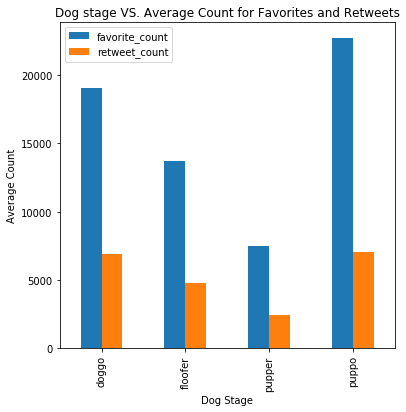

In [63]:
insight1a.plot(kind= 'bar',title='Dog stage VS. Average Count for Favorites and Retweets',figsize=(6,6))
plt.xlabel('Dog Stage')
plt.ylabel('Average Count');
# its clearly found that puppos gets more favorites and retweets on average, then doggos,floofers and finally puppers.

In [64]:
# let's group twitter_archive_master by 'dog_stage' column, then show some basic statistics for 'rating_numerator'.
# but first, let's filter our master dataset from outliers to get more accurate insight, 
# select only rows with rating_demerator = 10 AND rating_numerator within 10 to 14*.
# *: as found from before most rating_numerator values are within [10,14] interval.

filtered_df = twitter_archive_master[(twitter_archive_master.rating_denominator == 10) 
                                    & (twitter_archive_master.rating_numerator >= 10) 
                                    & (twitter_archive_master.rating_numerator < 15) 
                                    ]
# show some basic statistics for rating_numerator of the filtered_df
insight1b = filtered_df.groupby('dog_stage')['rating_numerator'].describe()
insight1b

,count,mean,std,min,25%,50%,75%,max
dog_stage,,,,,,,,
doggo,69.0,12.057971,1.174284,10.0,11.0,12.0,13.0,14.0
floofer,8.0,11.875000,1.125992,10.0,11.0,12.0,13.0,13.0
pupper,168.0,11.309524,1.088604,10.0,10.0,11.0,12.0,14.0
puppo,22.0,12.181818,1.139606,10.0,12.0,12.5,13.0,14.0


In [65]:
insight1b = filtered_df.groupby('dog_stage')['rating_numerator'].mean()
insight1b

dog_stage
doggo      12.057971
floofer    11.875000
pupper     11.309524
puppo      12.181818
Name: rating_numerator, dtype: float64

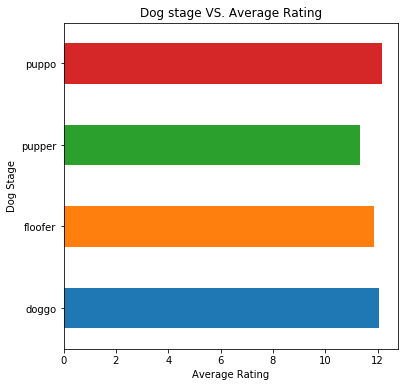

In [66]:
insight1b.plot(kind= 'barh',title='Dog stage VS. Average Rating',figsize=(6,6))
plt.ylabel('Dog Stage')
plt.xlabel('Average Rating');
# its clearly found that puppos gets also higher ratings on average, then doggos,floofers and finally puppers.

-------------
**onclusion:
Based on this analyze and visualization, its obvious that Puppos recieve higher attention by WeRateDogs account and his followers**

 ### Insight2:
In this analyze, we are curious to know When does WeRateDogs account usually tweet its tweets?, we can now that by answering the following questions:
   - What hour,day of week,week,and month does WeRateDogs more likely to tweet at/on ? 
   - For further curiosity, what year and date had highest number of tweets ever?

In [67]:
#HOUR
# find percentage of tweets tweeted for each hour 
hours_percentage = twitter_archive_master.timestamp.dt.hour.value_counts(normalize=True,sort = False)*100
hours_percentage

0     12.720848
1     14.083796
2     10.550227
3      8.278647
4      4.795558
5      1.312468
6      0.151439
13     0.050480
14     0.403836
15     4.543160
16     9.742554
17     8.076729
18     5.047956
19     4.088844
20     3.785967
21     3.483089
22     3.382130
23     5.502272
Name: timestamp, dtype: float64

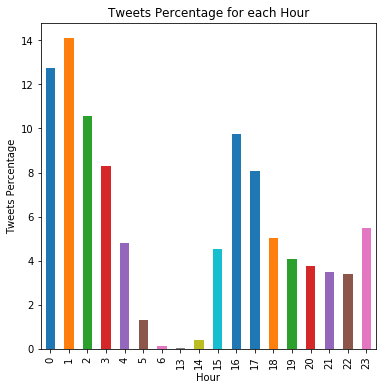

In [68]:
hours_percentage.plot(kind='bar',title='Tweets Percentage for each Hour',figsize=(6,6))
plt.xlabel('Hour')
plt.ylabel('Tweets Percentage');

In [69]:
# conclusions
# highest hour of tweets percentage is found to be 1am with 14%,
# we can also find that majority of tweets percentage can be found in two intervals
# first interval from 12am to 3am
interval1 = hours_percentage[0:4]
print(interval1)
interval1.sum() 

0    12.720848
1    14.083796
2    10.550227
3     8.278647
Name: timestamp, dtype: float64


45.633518425037856

In [70]:
# second interval from 3pm to 6pm
interval2 = hours_percentage[9:13]
print(interval2)
interval2.sum() 


15    4.543160
16    9.742554
17    8.076729
18    5.047956
Name: timestamp, dtype: float64


27.41039878849066

In [71]:
#DAY OF WEEK
# find percentage of tweets tweeted for each day of week
# day 0 is Monday and day 6 is Sunday
daysofweek_percentage = twitter_archive_master.timestamp.dt.dayofweek.value_counts(normalize=True,sort = False)*100
daysofweek_percentage

0    16.557294
1    14.790510
2    14.790510
3    14.184755
4    14.134276
5    12.670369
6    12.872287
Name: timestamp, dtype: float64

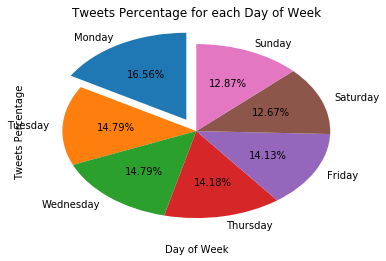

In [72]:
# replace day number with its name using days_list
days_list =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daysofweek_percentage.plot(labels=days_list,kind='pie',title='Tweets Percentage for each Day of Week',
                           startangle=90, autopct='%1.2f%%',explode=(0.15, 0, 0, 0, 0, 0, 0))
plt.xlabel('Day of Week')
plt.ylabel('Tweets Percentage');

In [73]:
#conclusion:
#all days of week have almost equal tweets percentage 
# with slightly higher percentage for monday of 16% then it decreases until it reaches sunday with 12%

In [74]:
#WEEK
# find percentage of tweets tweeted for each week
weeks_percentage = twitter_archive_master.timestamp.dt.week.value_counts(normalize=True,sort = False)*100
weeks_percentage

1     3.079253
2     2.574457
3     2.675416
4     2.271580
5     1.817264
6     2.271580
7     2.473498
8     2.069662
9     2.019182
10    2.221100
11    1.918223
12    1.463907
13    1.463907
14    1.312468
15    1.312468
16    1.009591
17    0.858152
18    1.463907
19    0.908632
20    0.959112
21    1.110550
22    1.413428
23    1.413428
24    1.261989
25    1.413428
26    1.867744
27    2.069662
28    1.362948
29    1.110550
30    1.766784
31    1.060071
32    0.403836
33    0.706714
34    0.555275
35    0.908632
36    0.706714
37    0.605755
38    0.807673
39    0.706714
40    0.706714
41    0.706714
42    0.757193
43    0.504796
44    1.161030
45    0.555275
46    0.757193
47    7.521454
48    7.420495
49    6.208985
50    6.057547
51    4.341242
52    3.735487
53    2.170621
Name: timestamp, dtype: float64

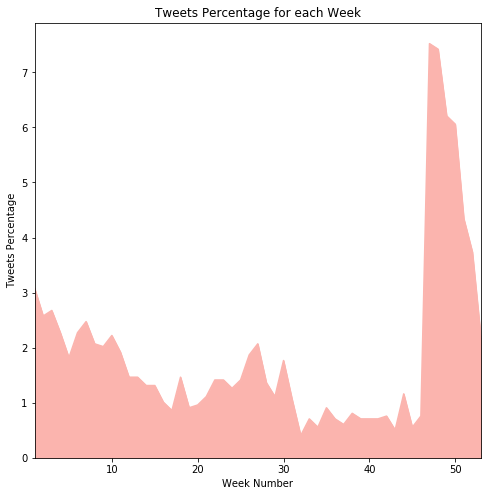

In [75]:
weeks_percentage.plot(kind='area',figsize=(8,8),title='Tweets Percentage for each Week',colormap="Pastel1",xlim=(1,53))
plt.xlabel('Week Number')
plt.ylabel('Tweets Percentage');

In [76]:
# conclusion:
# highest tweets percentage found to be at week 47 with 7.52%, then week 48 with 7.42%  


In [77]:
#MONTH
# find percentage of tweets tweeted for each month
months_percentage = twitter_archive_master.timestamp.dt.month.value_counts(normalize=True,sort = False)*100
months_percentage

1     11.761736
2      8.682484
3      8.329127
4      4.846037
5      4.997476
6      6.259465
7      7.016658
8      3.079253
9      3.180212
10     3.331651
11    17.566885
12    20.949016
Name: timestamp, dtype: float64

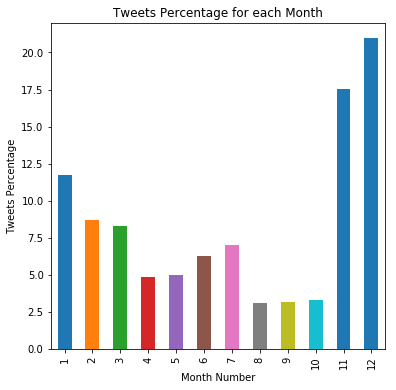

In [78]:
# months_list=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
months_percentage.plot(kind='bar',title='Tweets Percentage for each Month',figsize=(6,6))
plt.xlabel('Month Number')
plt.ylabel('Tweets Percentage');

In [79]:
# conclusion:
# highest tweets percentage found to be in December with almost 21% 

In [80]:
#YEAR and DATE
years_percentage = twitter_archive_master.timestamp.dt.year.value_counts(normalize=True,sort = False)*100
years_percentage

2015    33.064109
2016    48.914690
2017    18.021201
Name: timestamp, dtype: float64

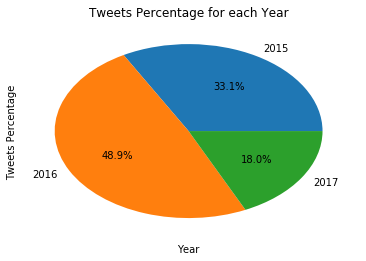

In [81]:
years_percentage.plot(kind='pie',title='Tweets Percentage for each Year', autopct='%1.1f%%')
plt.xlabel('Year')
plt.ylabel('Tweets Percentage');

In [82]:
# conclusion:
# 2016 had the highest tweets percentage of almost 49%

In [83]:
dates_percentage = twitter_archive_master.timestamp.dt.date.value_counts(normalize=True)*100
dates_percentage

2015-11-28    1.312468
2015-11-29    1.312468
2015-11-16    1.261989
2015-11-19    1.161030
2015-12-01    1.110550
2015-11-20    1.009591
2015-11-25    1.009591
2015-12-07    1.009591
2015-11-22    1.009591
2015-11-23    1.009591
2015-12-08    0.959112
2015-12-03    0.908632
2015-11-30    0.858152
2015-11-18    0.858152
2015-11-21    0.858152
2015-11-24    0.858152
2015-11-27    0.858152
2015-12-06    0.807673
2015-12-09    0.807673
2015-11-17    0.757193
2015-12-11    0.757193
2015-12-12    0.757193
2015-12-04    0.706714
2015-12-10    0.706714
2015-12-02    0.706714
2015-12-15    0.656234
2015-12-24    0.656234
2015-12-05    0.656234
2015-11-26    0.605755
2015-12-21    0.555275
                ...   
2016-05-16    0.050480
2016-10-19    0.050480
2016-04-10    0.050480
2016-05-08    0.050480
2016-08-19    0.050480
2016-08-09    0.050480
2017-03-30    0.050480
2017-03-16    0.050480
2017-05-10    0.050480
2017-03-18    0.050480
2016-09-17    0.050480
2017-04-21    0.050480
2016-12-05 

In [84]:
#conclusion:
# two days in a row found to have highest tweets percentage 2015-11-28 and 2015-11-29 of 1.31% each.

## in `image_predictions_df_cleaned`:

In [85]:
image_predictions_df_cleaned.tail()

,tweet_id,prediction_num,jpg_url,img_num,prediction,confidence,is_dog
6220,891327558926688256,3,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,German_Short-Haired_Pointer,0.175219,True
6221,891689557279858688,3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Spatula,0.040836,False
6222,891815181378084864,3,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Kelpie,0.031379,True
6223,892177421306343426,3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Papillon,0.068957,True
6224,892420643555336193,3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Banana,0.076110,False


### Insight3:
In this analyze we are curious to know about predictions via the following questions:
   - (a) what is the average confidence level and how likely the prediction is for a dog breed (is_dog = True) for each prediction number?
   - (b) what is the easiest dog breed to predict (highest confidence level) for each prediction number? 

In [86]:
insight3 = image_predictions_df_cleaned.groupby(['prediction_num','is_dog'])[['prediction','confidence']]
insight3.mean()


confidence
prediction_num is_dog            
1              False     0.540167
               True      0.613823
2              False     0.117090
               True      0.140470
3              False     0.056893
               True      0.061642

In [87]:
# conclusion:
# its pretty obvious that predictions for dog breeds is associated with higher confidence levels for each prediction num,
# for example: predicting a dog breed based on the 1st prediction is about 61% true on average.

In [88]:
insight3.max()

prediction  confidence
prediction_num is_dog                               
1              False               Zebra    1.000000
               True    Yorkshire_Terrier    0.999956
2              False         Wood_Rabbit    0.488014
               True    Yorkshire_Terrier    0.467678
3              False               Zebra    0.255182
               True    Yorkshire_Terrier    0.273419

In [89]:
#conclusion:
# this shows that Yorkshire_Terriers are easy to predict (highest confidence level) for each prediction number